In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [2]:
df = pd.read_csv(s, header=None,encoding='utf-8')

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df[(df[4]=='Iris-setosa') | (df[4]=='Iris-versicolor') ]

In [5]:
y = df[4].values
y = np.where(y=='Iris-setosa', 1 , 0)
X = df.iloc[:, [0,2]].values

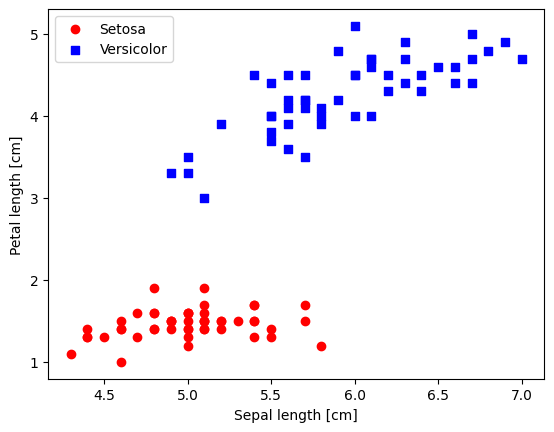

In [6]:
plt.scatter(X[:50, 0], X[:50, 1],\
color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],\
color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

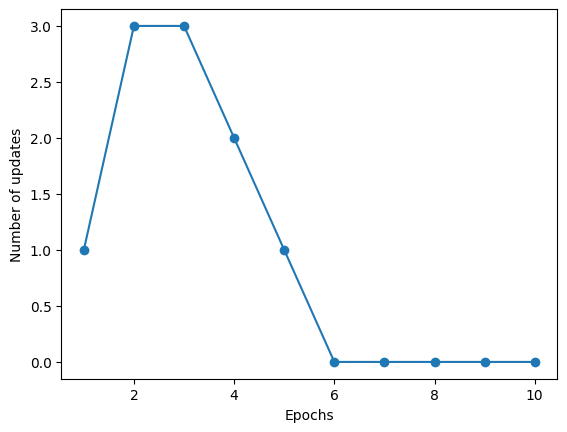

In [7]:
from perceptron import Perceptron

ppn = Perceptron(eta= 0.1 ,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1),

          ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


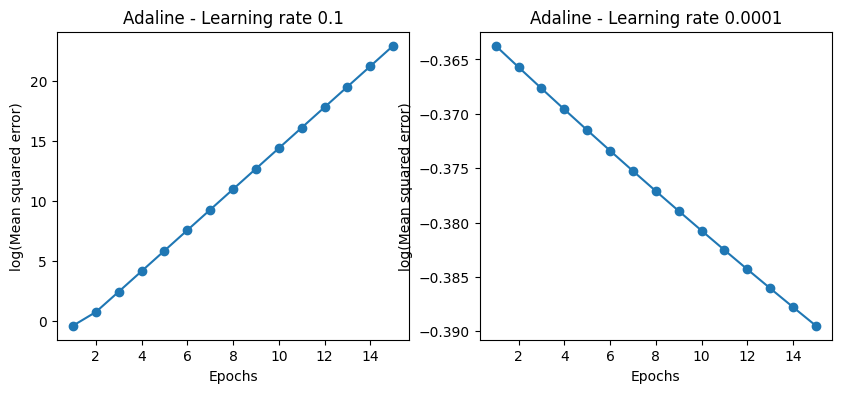

In [6]:
from adaline import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iters=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iters=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), np.log10(ada2.losses_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean squared error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()